# Concrete Strength Prediction


## Problem Statement

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%. 

<b>Resources available</b>

he data for this project is available in file 
https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/


<b>Attribute information</b>
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable

#### Analsysis Conducted by : Silambarasan Subramanian
https://github.com/ssilambarasan

### Importing libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
%matplotlib inline

In [2]:
con=pd.read_csv('concrete.csv')

### Univariate Analysis

In [3]:
con.shape

(1030, 9)

In [4]:
con.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
con.isnull().values.any()

False

In [6]:
con.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
con.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
con.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

<AxesSubplot:xlabel='variable', ylabel='value'>

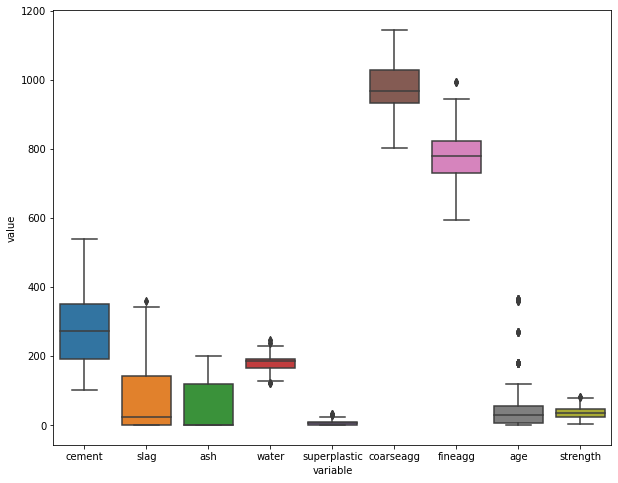

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(x="variable", y="value", data=pd.melt(con))

### Bivariate Analysis

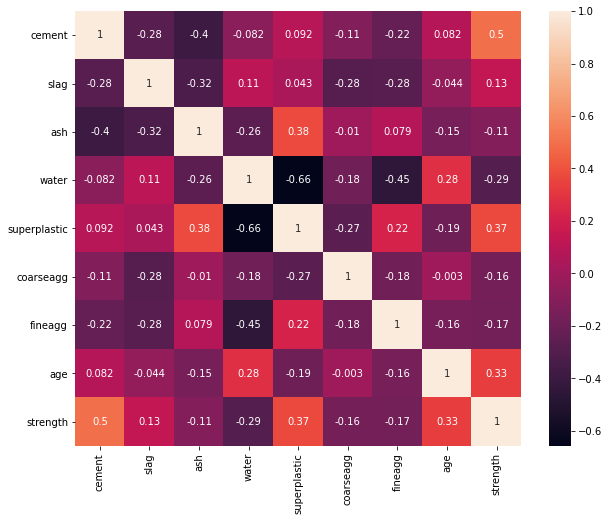

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(con.corr(),annot=True)
plt.show()

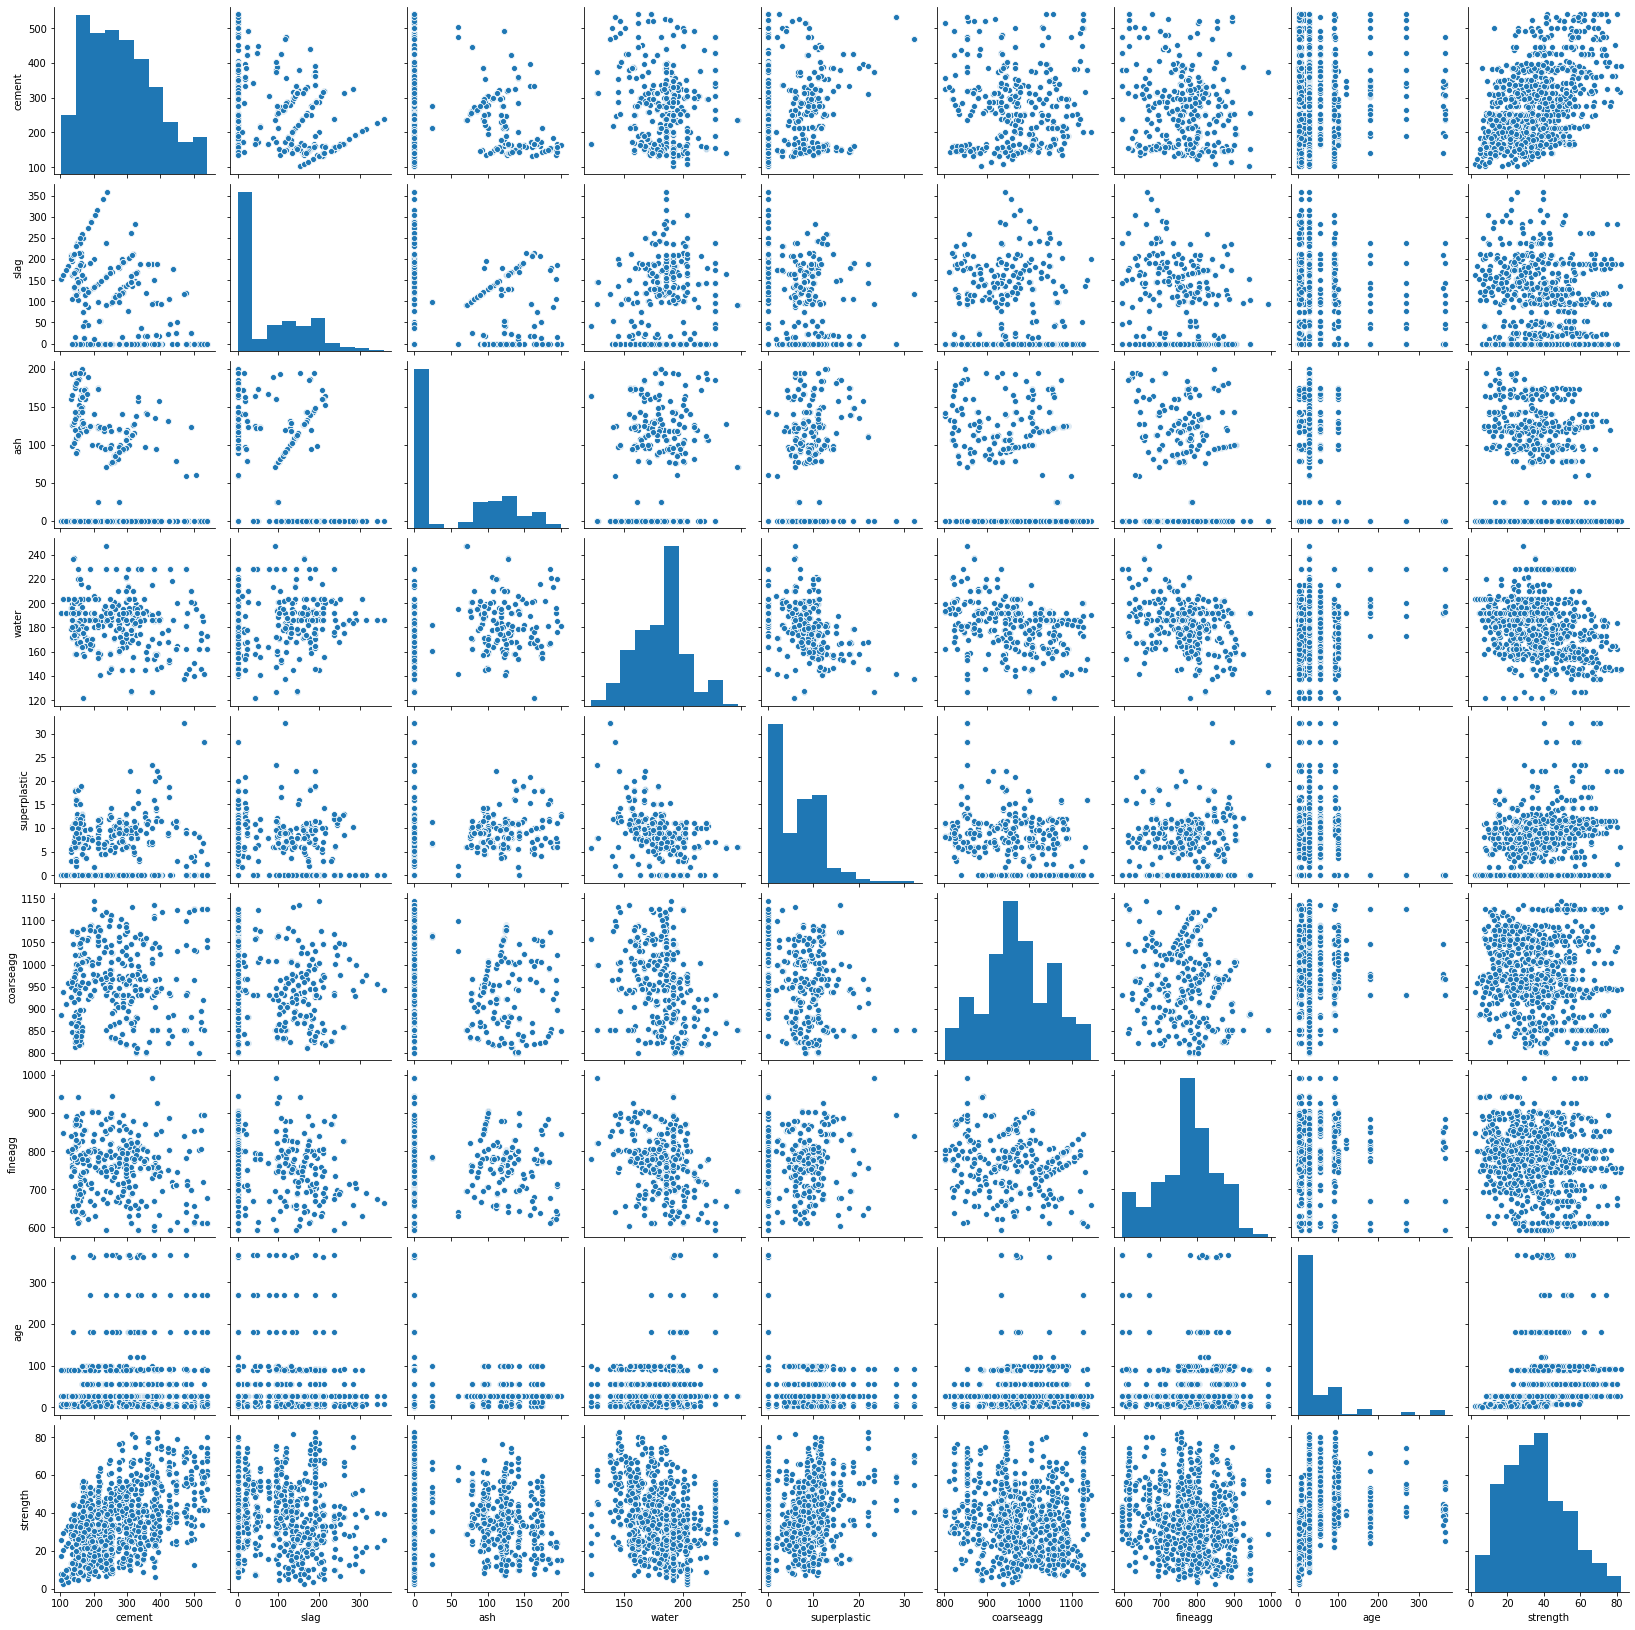

In [12]:
sns.pairplot(con)

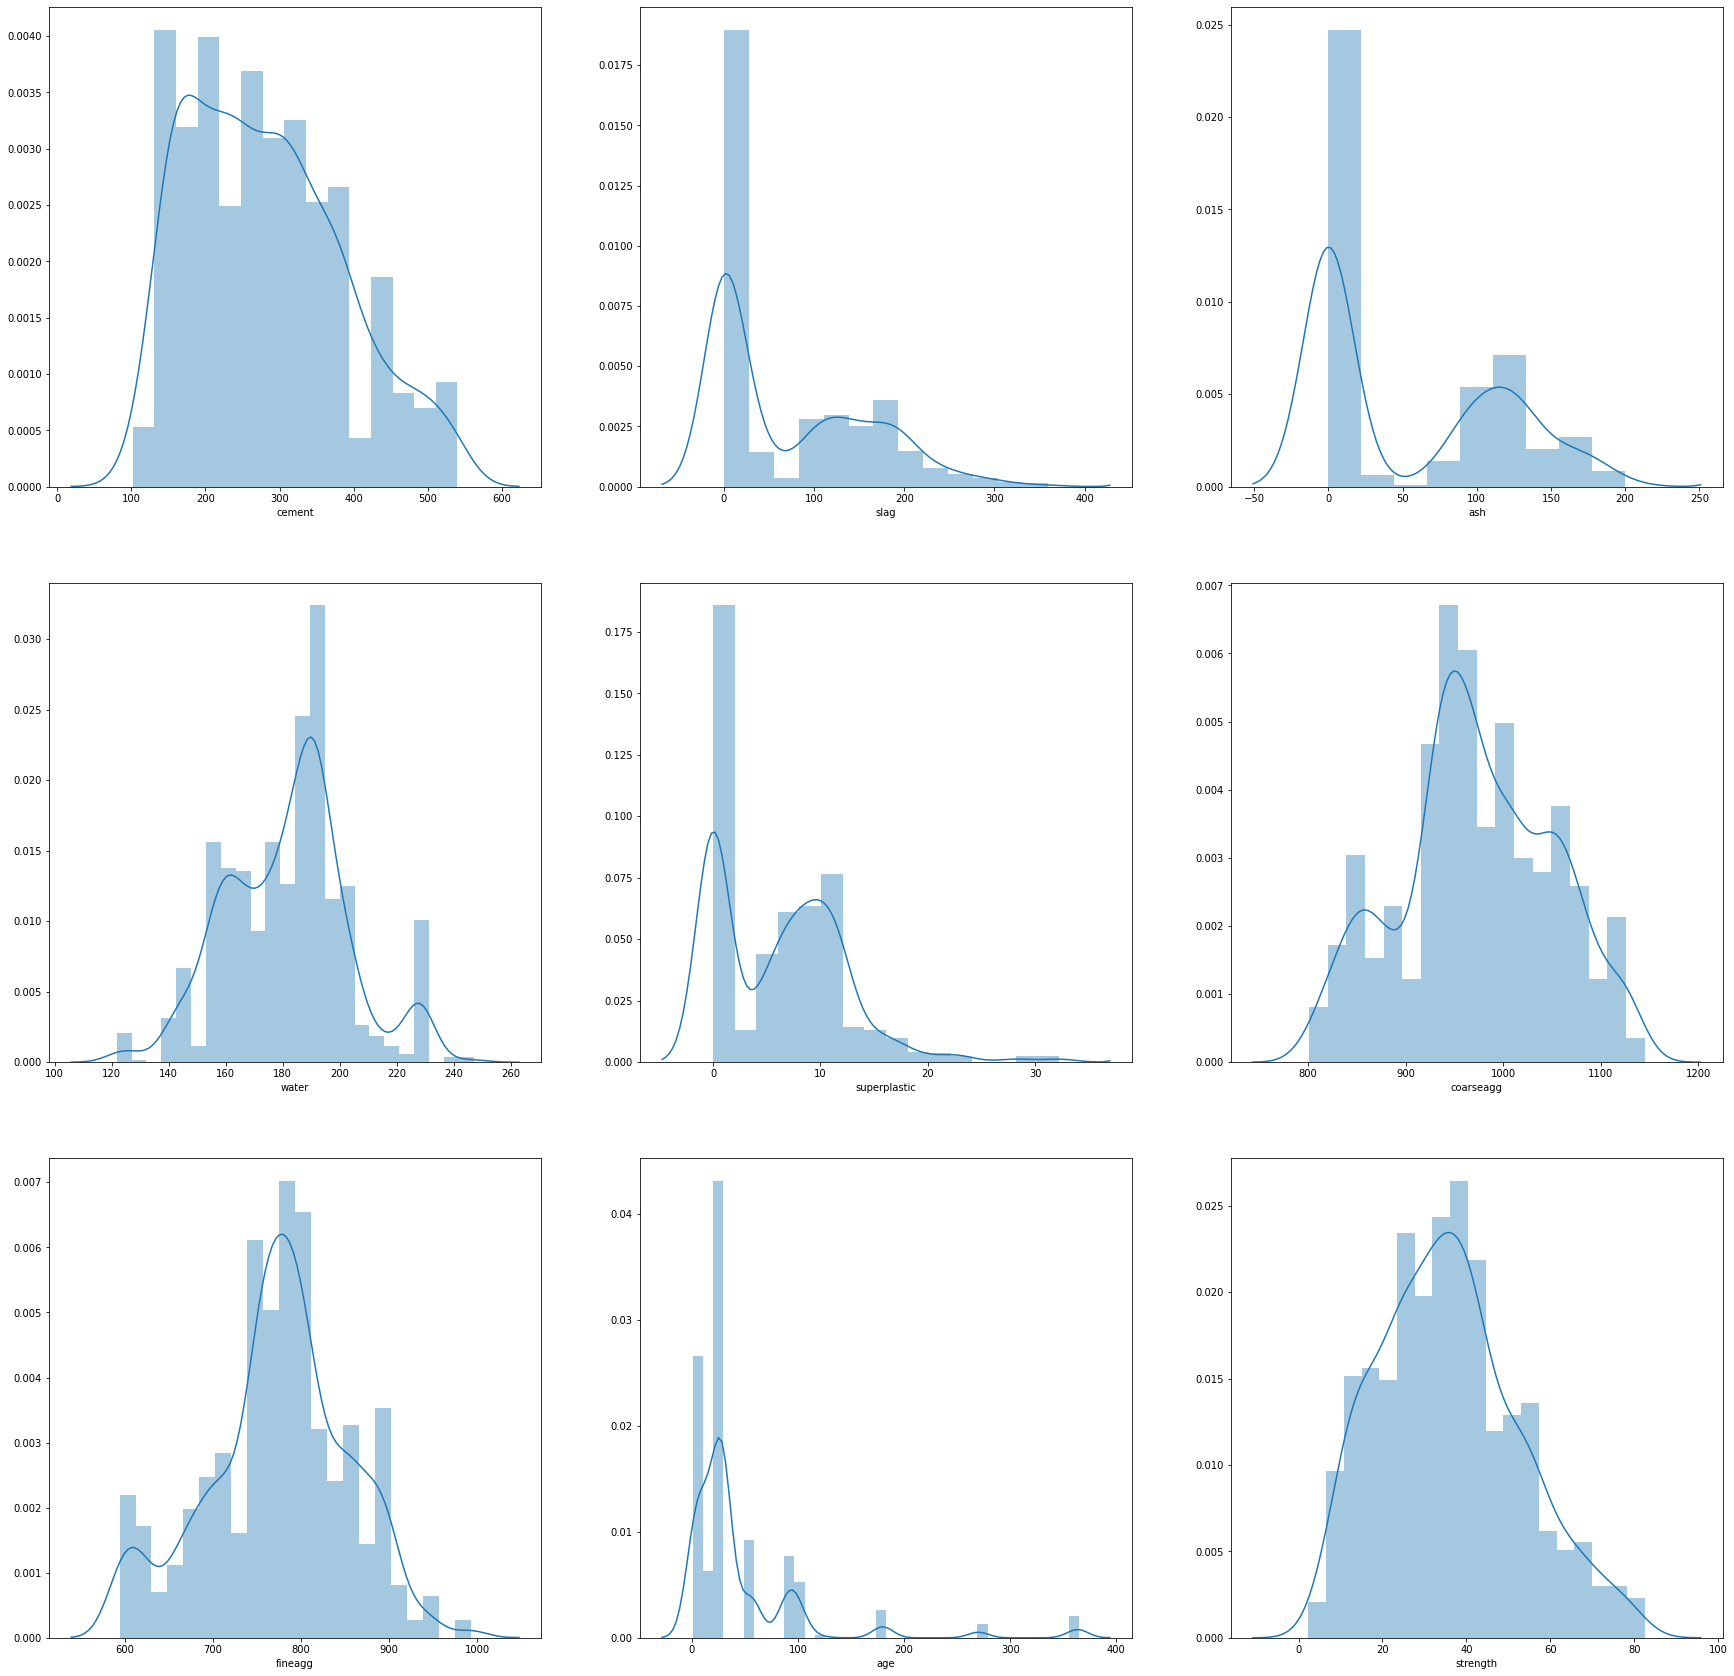

In [13]:
features=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']

plt.figure(figsize=(30,30))
pos=1

for i in features:
    plt.subplot(3,3,pos)
    sns.distplot(con[i])
    pos+=1

- Strength & Cement have a strong co-relation 
- No other signigficant relationship exists between the data points

### Data Model Preparation / Feature Engineering

In [14]:
cons=con

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols_to_scale=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']
cons[cols_to_scale]=scaler.fit_transform(cons[cols_to_scale].to_numpy())

In [16]:
X=cons.drop(columns=['strength'],axis=1)
Y=cons['strength']

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=30)

### Model Building

In [18]:
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()
LinReg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
LinReg_Pred=LinReg.predict(xtest)

In [21]:
mean_absolute_error(ytest,LinReg_Pred)

8.759483817439035

In [22]:
mean_squared_error(ytest,LinReg_Pred)

125.05690122706143

In [23]:
r2_score(ytest,LinReg_Pred)

0.5809245422035247

In [24]:
print("Linear Regression: ")
print("Training Score: ",LinReg.score(xtrain,ytrain))
print("Testing Score: ",LinReg.score(xtest,ytest))

Linear Regression: 
Training Score:  0.6281519784369178
Testing Score:  0.5809245422035247


In [25]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3, random_state = 42)
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_rf = rf.predict(xtest)
rf.score(xtest,ytest)

0.9007791386824935

In [26]:
pd.DataFrame(rf.feature_importances_,xtrain.columns).sort_values(by=0,ascending=False)

,0
age,0.342066
cement,0.305011
water,0.109798
slag,0.081738
superplastic,0.080408
fineagg,0.040206
coarseagg,0.023527
ash,0.017247


In [27]:
print("Random Forest Regressor: ")
print("Training Score: ",rf.score(xtrain,ytrain))
print("Testing Score: ",rf.score(xtest,ytest))
print("Overall Score: ",rf.score(X,Y))

Random Forest Regressor: 
Training Score:  0.9826467714336421
Testing Score:  0.9007791386824935
Overall Score:  0.959169219687494


In [28]:
resultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [rf.score(X,Y)]})
resultsDf

,Method,accuracy
0,Random Forest,0.959169


### K-Fold Cross Validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.50,random_state=30)

In [31]:
Kfold=KFold(n_splits=10,random_state=30)
model_rf=RandomForestRegressor()
Kfold_rf_results=cross_val_score(model_rf,X,Y,cv=Kfold)

C:\Users\SSila\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [32]:
print(Kfold_rf_results)
print("Accuracy: %.3f%% (%.3f%%)" %  (Kfold_rf_results.mean()*100.0,Kfold_rf_results.std()*100.0))

[0.88076002 0.8858872  0.95115879 0.92238163 0.88763755 0.93658608
 0.93579437 0.92363172 0.9172851  0.93227468]
Accuracy: 91.734% (2.314%)


### AdaBoosting

In [33]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(n_estimators = 50, learning_rate=0.1, random_state=30)
abcl.fit(xtrain, ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=50, random_state=30)

In [34]:
pred_AB =abcl.predict(xtest)
acc_AB = abcl.score(X,Y)
acc_AB

0.7694116938435901

In [35]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy
0,Random Forest,0.959169
0,Adaboost,0.769412


### Bagging

In [36]:
from sklearn.ensemble import BaggingRegressor

bgrgr = BaggingRegressor(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=30)
bgrgr = bgrgr.fit(xtrain,ytrain)

In [37]:
pred_BG = bgrgr.predict(xtest)
acc_BG = bgrgr.score(X,Y)
acc_BG

0.9213017628869283

In [38]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy
0,Random Forest,0.959169
0,Adaboost,0.769412
0,Bagging,0.921302


### RandomizedSearchCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth': [5,10], 'max_features':['auto','sqrt'], 'n_estimators':[100]}
rf_tuned = RandomizedSearchCV(RandomForestRegressor(),parameters,cv=5)
rf_tuned.fit(xtrain,ytrain)

C:\Users\SSila\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [40]:
rf_tuned.score(X,Y)

0.9321946724694304

In [41]:
print("Random Forest Regressor - RandomizedSearchCV: ")
print("Training Score: ",rf_tuned.score(xtrain,ytrain))
print("Testing Score: ",rf_tuned.score(xtest,ytest))
print("Overall Score: ",rf_tuned.score(X,Y))

Random Forest Regressor - RandomizedSearchCV: 
Training Score:  0.9806789912761906
Testing Score:  0.8889356095942084
Overall Score:  0.9321946724694304


In [42]:
print("Random Forest Regressor: ")
print("Training Score: ",rf.score(xtrain,ytrain))
print("Testing Score: ",rf.score(xtest,ytest))
print("Overall Score: ",rf.score(X,Y))

Random Forest Regressor: 
Training Score:  0.9559142638304472
Testing Score:  0.9620670831474197
Overall Score:  0.959169219687494


In [43]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest - Random Search CV'], 'accuracy': [rf_tuned.score(X,Y)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,accuracy
0,Random Forest,0.959169
0,Adaboost,0.769412
0,Bagging,0.921302
0,Random Forest - Random Search CV,0.932195


In [44]:
comdf = pd.DataFrame(columns=['Algorithm', 'Training Score', 'Testing Score','Overall Score'])
comdf.loc[1] = ['Random Forest Regressor',rf.score(xtrain,ytrain),rf.score(xtest,ytest),rf.score(X,Y)]
comdf.loc[2] = ['Random Forest - Random Search CV',rf_tuned.score(xtrain,ytrain),rf_tuned.score(xtest,ytest),rf_tuned.score(X,Y)]
comdf

,Algorithm,Training Score,Testing Score,Overall Score
1,Random Forest Regressor,0.955914,0.962067,0.959169
2,Random Forest - Random Search CV,0.980679,0.888936,0.932195


### Observation

- Random forest (without hyper-parameter tuning) performs well for this data 
- There is no significant impprovement even after hyper-parameter tuning
- Random Forest - Random Search CV method seem to be a over fit as it does good in training data & poor in test data